# YOLOV8关键点检测预测-Python API-图像

同济子豪兄 2023-4-27

## 导入工具包

In [1]:
from ultralytics import YOLO
import torch

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device:', device)

device: cuda:0


## 载入模型

In [2]:
# model = YOLO('checkpoint/Triangle_215_yolov8n_pretrain.pt')
model = YOLO('checkpoint/Triangle_215_yolov8x_p6_pretrain.pt')

## 计算设备

In [3]:
# 切换计算设备
model.to(device)
# model.cpu()  # CPU
# model.cuda() # GPU

## 模型自带信息

In [4]:
model.device

device(type='cuda', index=0)

In [5]:
model.names

{0: 'sjb_rect'}

## 预测

传入图像、视频、摄像头ID（对应命令行的 source 参数）

In [6]:
img_path = 'images/triangle_4.jpg'

In [9]:
results = model(img_path)

## 解析预测结果

In [28]:
len(results)

1

In [10]:
results[0]

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: tensor([[[2.4630e+03, 1.9212e+03, 9.9904e-01],
         [2.5274e+03, 3.5332e+03, 9.9783e-01],
         [1.7828e+03, 3.1749e+03, 9.9906e-01]],

        [[2.9084e+03, 1.3631e+03, 9.9924e-01],
         [4.4086e+03, 6.7891e+02, 9.9961e-01],
         [4.3366e+03, 1.4838e+03, 9.9954e-01]],

        [[1.2739e+03, 1.7403e+03, 9.9530e-01],
         [2.1924e+03, 4.5937e+02, 9.9938e-01],
         [2.5570e+03, 1.1652e+03, 9.9789e-01]]], device='cuda:0')
keys: ['boxes', 'keypoints']
masks: None
names: {0: 'sjb_rect'}
orig_img: array([[[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140

## 解析目标检测预测结果

In [11]:
# 预测框的所有类别（MS COCO数据集八十类）
results[0].names

{0: 'sjb_rect'}

In [12]:
# 预测类别 ID
results[0].boxes.cls

tensor([0., 0., 0.], device='cuda:0')

In [13]:
num_bbox = len(results[0].boxes.cls)
print('预测出 {} 个框'.format(num_bbox))

预测出 3 个框


In [14]:
# 每个框的置信度
results[0].boxes.conf

tensor([0.9731, 0.9673, 0.9624], device='cuda:0')

In [15]:
# 每个框的：左上角XY坐标、右下角XY坐标
results[0].boxes.xyxy

tensor([[1739., 1894., 2555., 3573.],
        [2921.,  656., 4447., 1540.],
        [1235.,  443., 2544., 1756.]], device='cuda:0')

In [16]:
# 转成整数的 numpy array
bboxes_xyxy = results[0].boxes.xyxy.cpu().numpy().astype('uint32')

In [17]:
bboxes_xyxy

array([[1739, 1894, 2555, 3573],
       [2921,  656, 4447, 1540],
       [1235,  443, 2544, 1756]], dtype=uint32)

## 解析关键点检测预测结果

In [18]:
# 每个框，每个关键点的 XY坐标 置信度
results[0].keypoints.shape

torch.Size([3, 3, 3])

In [38]:
# results[0].keypoints

In [19]:
bboxes_keypoints = results[0].keypoints.cpu().numpy().astype('uint32')

In [20]:
# 转为 numpy array
bboxes_keypoints

array([[[2462, 1921,    0],
        [2527, 3533,    0],
        [1782, 3174,    0]],

       [[2908, 1363,    0],
        [4408,  678,    0],
        [4336, 1483,    0]],

       [[1273, 1740,    0],
        [2192,  459,    0],
        [2557, 1165,    0]]], dtype=uint32)

## OpenCV可视化关键点

In [33]:
img_bgr = cv2.imread(img_path)

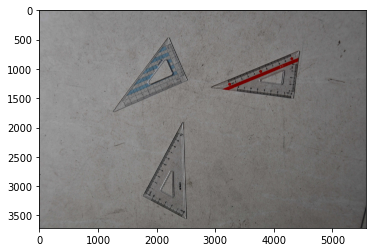

In [34]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [35]:
# 框（rectangle）可视化配置
bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':4,         # 字体大小
    'font_thickness':10,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [36]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':40},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':40},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':40},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':120,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':12},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':12},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':12},         # 60度角点-90度角点
]

In [37]:
for idx in range(num_bbox): # 遍历每个框
    
    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx] 
    
    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = results[0].names[0]
    
    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)
    
    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])
    
    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度
    
    # 画该框的骨架连接
    for skeleton in skeleton_map:
        
        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]
        
        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]
        
        # 获取骨架连接颜色
        skeleton_color = skeleton['color']
        
        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']
        
        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)
        
    # 画该框的关键点
    for kpt_id in kpt_color_map:
        
        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]
        
        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)
        
        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        # kpt_label = str(kpt_id) # 写关键点类别 ID
        kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

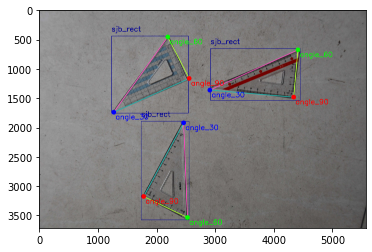

In [38]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [39]:
cv2.imwrite('C1_output.jpg', img_bgr)

True